In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_utils import load_data

X_train, y_train = load_data('dataset/train.csv')
X_test, y_test = load_data('dataset/test.csv')

X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)

/Users/ayush/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


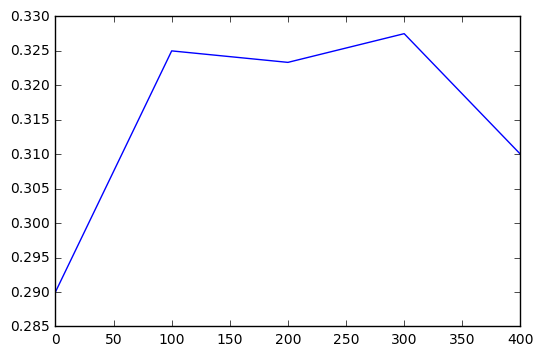

l2(w) = 82.1602965475
for netta=0.8: 65.3%


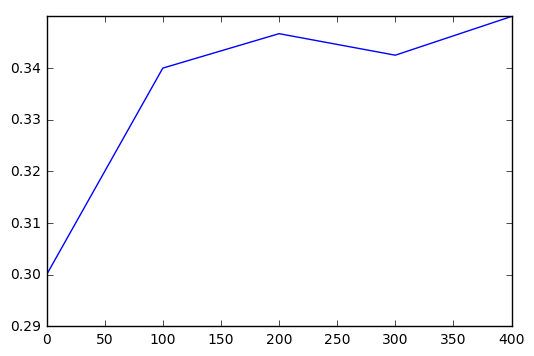

l2(w) = 0.00731897909589
for netta=0.001: 64.55%


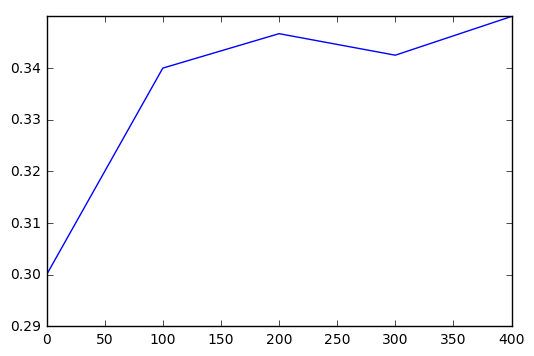

l2(w) = 9.56044016838e-07
for netta=1e-05: 64.55%


In [5]:
from logistic import logistic_loss

for netta in [0.8, 1e-3, 1e-5]:
    w = np.zeros(X_train.shape[1])
    losses = []
    total_loss = 0
    for i in range(X_train.shape[0]):
        loss, dw = logistic_loss(X_train[i, :].reshape(1, -1), y_train[i].reshape(1,), w)
        w = w + netta * dw
        total_loss += loss
        if (i + 1) % 100 == 0:
            losses.append(1.0 * total_loss / (i + 1))

    y_pred = logistic_loss(X_test, None, w)
    y_pred = 1 * (y_pred > 0.5)
    
    plt.plot(np.arange(len(losses)) * 100, losses)
    plt.show()
    
    print 'l2(w) = ' + str(np.sum(w ** 2))
    
    accuracy = 1.0 * np.sum(y_pred == y_test) / y_test.shape[0]
    print 'for netta=' + str(netta) + ': ' + str(round(accuracy * 100, 2)) + '%'